In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [3]:
# Load dataset
data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Basic info
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


0 missing values in dataset


C:\Users\ahuja\AppData\Local\Temp\ipykernel_319036\2822483059.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='pastel')


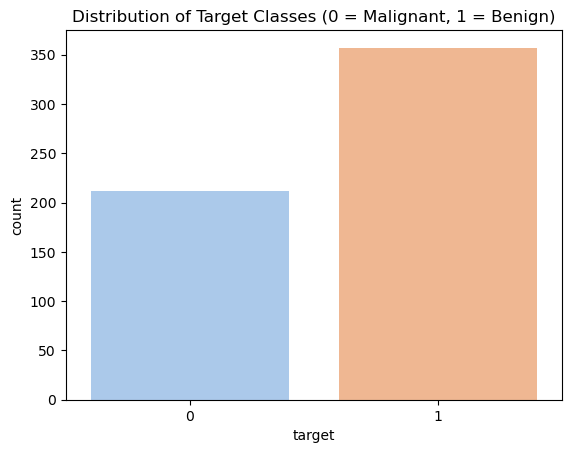

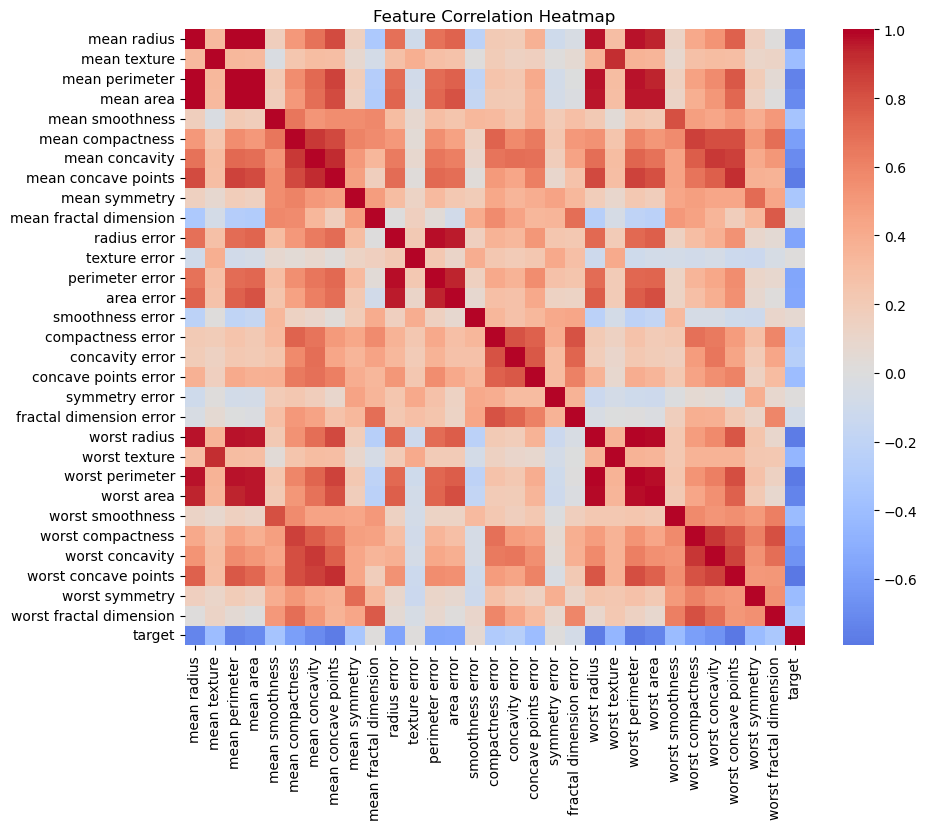

In [4]:
# Check for missing values
print(df.isnull().sum().sum(), "missing values in dataset")

# Display target distribution
sns.countplot(x='target', data=df, palette='pastel')
plt.title("Distribution of Target Classes (0 = Malignant, 1 = Benign)")
plt.show()

# Correlation heatmap (optional)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
X = df.drop('target', axis=1)
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Logistic Regression Accuracy: 98.25 %

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



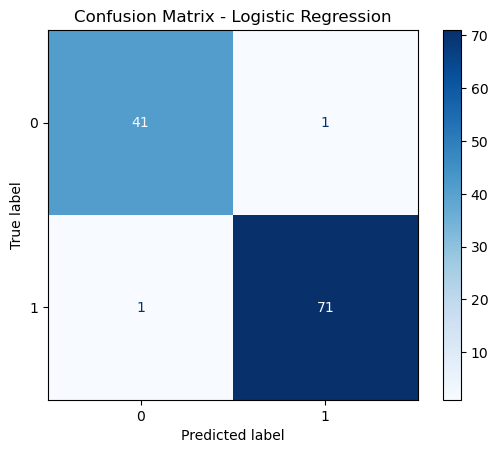

In [7]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred_lr)*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


SVM Accuracy: 98.25 %

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



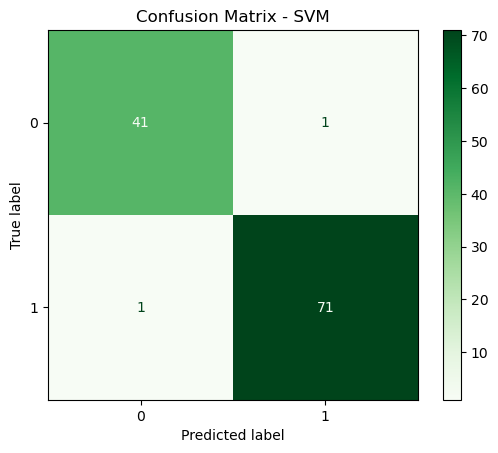

In [8]:
svm_model = SVC(kernel='rbf', C=2, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

print("SVM Accuracy:", round(accuracy_score(y_test, y_pred_svm)*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

ConfusionMatrixDisplay.from_estimator(svm_model, X_test_scaled, y_test, cmap='Greens')
plt.title("Confusion Matrix - SVM")
plt.show()


Random Forest Accuracy: 94.74 %

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



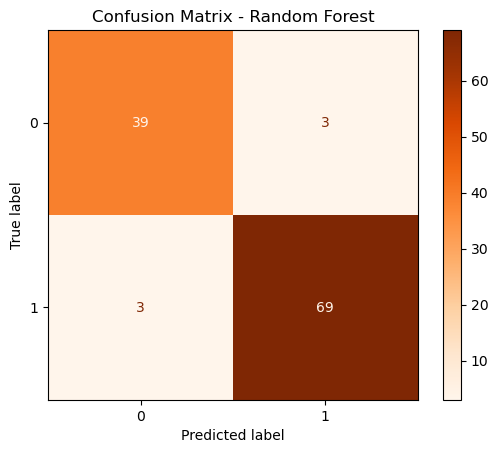

In [9]:
rf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf)*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Oranges')
plt.title("Confusion Matrix - Random Forest")
plt.show()


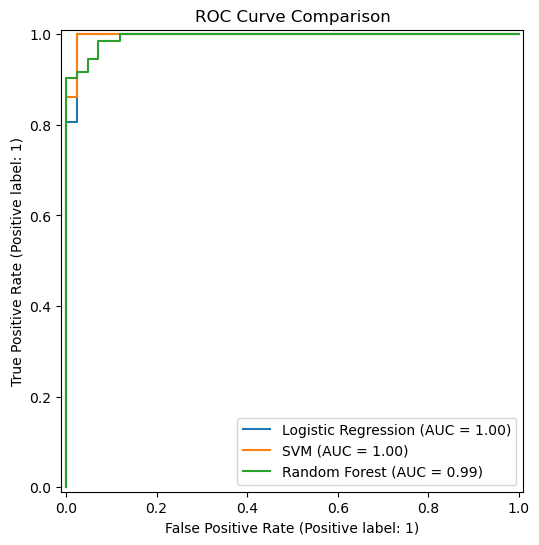

In [10]:
plt.figure(figsize=(7,6))
RocCurveDisplay.from_estimator(log_reg, X_test_scaled, y_test, ax=plt.gca(), name='Logistic Regression')
RocCurveDisplay.from_estimator(svm_model, X_test_scaled, y_test, ax=plt.gca(), name='SVM')
RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=plt.gca(), name='Random Forest')
plt.title("ROC Curve Comparison")
plt.show()


C:\Users\ahuja\AppData\Local\Temp\ipykernel_319036\3759907343.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


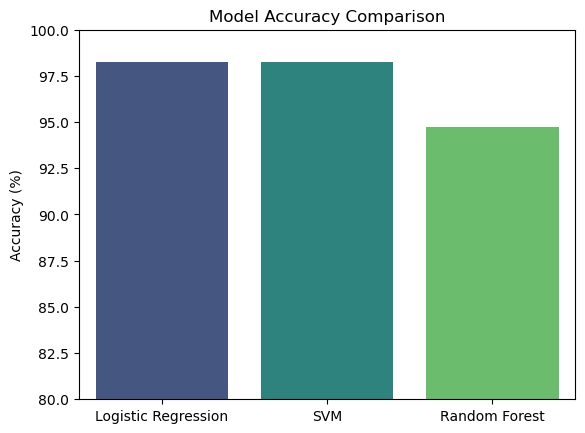

In [11]:
models = ['Logistic Regression', 'SVM', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_lr)*100,
    accuracy_score(y_test, y_pred_svm)*100,
    accuracy_score(y_test, y_pred_rf)*100
]

sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.ylim(80, 100)
plt.show()
